In [1]:
import numpy as np
import pandas as pd

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


## Load dữ liệu

In [2]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

## Tiền xử lí

In [5]:
# Đổi tên các cột cho phù hợp
df = df.rename(columns={'MntWines': 'Wines',
                        'MntFruits': 'Fruits',
                        'MntMeatProducts': 'Meat',
                        'MntFishProducts': 'Fish',
                        'MntSweetProducts': 'Sweets',
                        'MntGoldProds': 'Gold'})
# Danh sách các cột
print(df.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Kiểm tra missing value
df.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Xử lí mising cột Income
income_missing = df[df['Income'].isna()]
income_missing


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
# Tính trung bình thu nhập dựa theo nhóm education
group_means = df.groupby('Education')['Income'].mean()

# Tính các giá trị thiếu trong cột income
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))


In [10]:
print('Missing data: ', df.isna().sum().sum())


Missing data:  0


In [11]:
# chuyển sang kiểu date time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Tính tuổi dựa vào năm sinh
df['Age'] = 2022 - df['Year_Birth']


In [12]:
# Đếm giá trị của cột phân loại
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())


Values of Education levels:  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status:  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [13]:
# Nhóm tình trạng hôn nhân thành hai tình trạng duy nhất
df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: "Partner" if x in {"Married", "Together"} else "Alone")


# Phân chia trình độ học vấn theo ba nhóm
df['Education'] = df['Education'].replace({'Basic': 'Undergrade',
                                           '2n Cycle': 'Undergrade',
                                           'Graduation': 'Graduate',
                                           'Master': 'Postgraduate',
                                           'PhD': 'Postgraduate'})


print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())


Values of Education levels:  Graduate        1127
Postgraduate     856
Undergrade       257
Name: Education, dtype: int64
Values of Marital Status:  Partner    1444
Alone       796
Name: Marital_Status, dtype: int64


In [14]:
# Tính tổng số trẻ em sống trong hộ gia đình
df['Children'] = df['Kidhome'] + df['Teenhome']

# Tính tổng số thành viên trong hộ gia đình
df['Family_Size'] = df['Marital_Status'].replace(
    {"Alone": 1, "Partner": 2}) + df['Children']

# Kiểm tra phải là cha mẹ
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)


In [15]:
# Tổng chi tiêu cho các danh mục khác nhau
df['Spent'] = df['Wines'] + df['Fruits'] + \
    df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']


In [16]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size,Is_Parent,Spent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,65,0,1,0,1617
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,68,2,3,1,27
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,0,2,0,776
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,38,1,3,1,53
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,41,1,3,1,422


In [17]:
to_drop = ['Dt_Customer', 'Z_CostContact',
           'Z_Revenue', 'Year_Birth', 'Kidhome','Teenhome']
df = df.drop(to_drop, axis=1)
df.shape

# Drop outliers by setting a cap in the 'Income' and 'Age' columns
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('The total number of data points after removing outliers:', len(df))


The total number of data points after removing outliers: 2236


In [18]:
df.to_csv('Marketing_end.csv', sep='\t', encoding='utf-8')


In [19]:
df.shape

(2236, 28)

## Gán nhãn

### Gán nhãn cho dữ liệu phân loại

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [21]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

ds = df.copy()
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

# label encode each column in the list
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])

print(ds.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   int32  
 2   Marital_Status       2236 non-null   int32  
 3   Income               2236 non-null   float64
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   i

In [22]:
ds['Education'].unique()


array([0, 1, 2])

In [23]:
ds['Marital_Status'].unique()


array([0, 1])

### Scale data sử dụng Stander Scaler

In [24]:
# Get data for scaling by removing boolean columns
from sklearn.discriminant_analysis import StandardScaler


#bool_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#                'AcceptedCmp2', 'Complain', 'Response']

#df_before_scale = ds.drop(bool_columns, axis=1)  # new data frame with numeric

# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(ds)


# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=ds.columns)

df_scaled.head().T


,0,1,2,3,4
ID,-0.020039,-1.052682,-0.446351,0.182791,-0.081689
Education,-0.894380,-0.894380,-0.894380,-0.894380,0.570700
Marital_Status,-1.347635,-1.347635,0.742041,0.742041,0.742041
Income,0.288195,-0.262715,0.917627,-1.182829,0.295435
Recency,0.306856,-0.383971,-0.798467,-0.798467,1.550344
Wines,0.983228,-0.871064,0.362159,-0.871064,-0.389661
Fruits,1.554170,-0.636431,0.572177,-0.560893,0.421101
Meat,1.679746,-0.713455,-0.177201,-0.651409,-0.217088
Fish,2.461068,-0.650414,1.344595,-0.503991,0.154911
Sweets,1.475396,-0.631638,-0.147262,-0.583200,-0.001950


In [25]:
features1 = ["Education","Children","Age","Income","Spent"]

data1 = df_scaled[features1].copy()
data1

,Education,Children,Age,Income,Spent
0,-0.89438,-1.264308,1.016868,0.288195,1.680176
1,-0.89438,1.395139,1.273264,-0.262715,-0.962202
2,-0.89438,-1.264308,0.333146,0.917627,0.282541
3,-0.89438,0.065416,-1.290693,-1.182829,-0.918994
4,0.57070,0.065416,-1.034298,0.295435,-0.305762
...,...,...,...,...,...
2231,-0.89438,0.065416,0.162216,0.432299,1.221499
2232,0.57070,2.724862,1.956986,0.562669,-0.269201
2233,-0.89438,-1.264308,-1.034298,0.234150,1.055312
2234,0.57070,0.065416,1.102333,0.807015,0.393886


Elbow Method to determine the number of clusters to be formed:


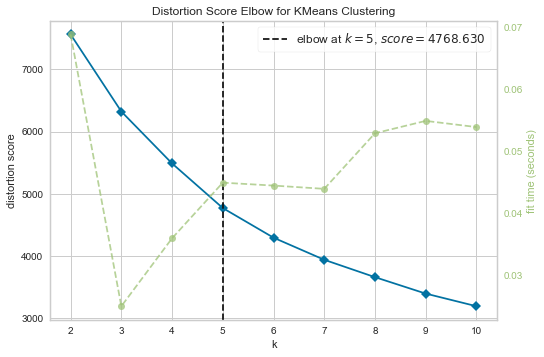

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=123), k=10)
Elbow_M.fit(data1)
Elbow_M.show()


In [27]:
features2 = ["Marital_Status", "Is_Parent",
             "Family_Size", "NumWebPurchases", "NumStorePurchases"]

data2 = df_scaled[features2].copy()
data2


,Marital_Status,Is_Parent,Family_Size,NumWebPurchases,NumStorePurchases
0,-1.347635,-1.584362,-1.758810,1.407639,-0.552429
1,-1.347635,0.631169,0.445618,-1.110921,-1.167738
2,0.742041,-1.584362,-0.656596,1.407639,1.293496
3,0.742041,0.631169,0.445618,-0.751127,-0.552429
4,0.742041,0.631169,0.445618,0.328256,0.062879
...,...,...,...,...,...
2231,0.742041,0.631169,0.445618,1.767433,-0.552429
2232,0.742041,0.631169,2.650045,1.407639,-0.244775
2233,-1.347635,-1.584362,-1.758810,-0.751127,2.216459
2234,0.742041,0.631169,0.445618,0.688050,1.293496


Elbow Method to determine the number of clusters to be formed:


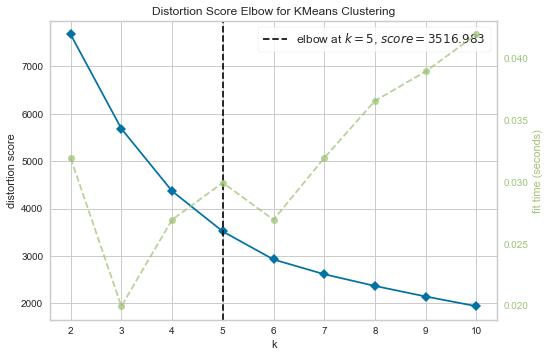

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=123), k=10)
Elbow_M.fit(data2)
Elbow_M.show()
